<a href="https://colab.research.google.com/github/cennetceylan19/ImageClassificationMnistExample/blob/main/ImageClassificationCifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Image Classification - CIFAR10**
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

**Classes :**
ucak, otomobil, kus, kedi, geyik, kopek, kurbaga, at, gemi, kamyon

Here are the classes in the dataset, as well as 10 random images from each:
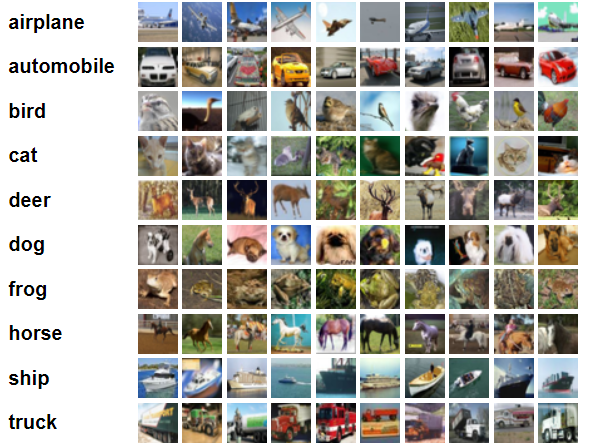



#Imports

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

#Preparing the data

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
# train set - images
x_train.shape

(50000, 32, 32, 3)

In [4]:
# test set - images
x_test.shape

(10000, 32, 32, 3)

In [5]:
CLASSES = ['ucak', 'otomobil', 'kus', 'kedi', 'geyik', 'kopek', 'kurbaga', 'at', 'gemi', 'kamyon']

In [6]:
CLASSES[3]

'kedi'

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


gemi


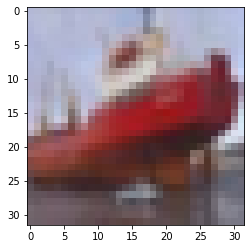

In [8]:
# example training data
index = 1416
plt.imshow(x_train[index], vmin=32, vmax=32)
print(CLASSES[int(y_train[index])])

at


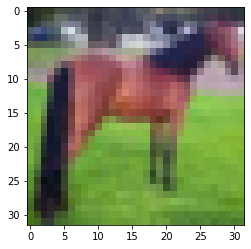

In [9]:
# ornek test data
index = 1966
plt.imshow(x_test[index])
print(CLASSES[int(y_test[index])])

inputlar train oncesi float32 tipine donusturulur

In [10]:
# before
print(x_train.dtype)

uint8


In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [26]:
# after
print(x_train.dtype)

float32


Normalize pixel values

In [13]:
x_train /= 255
x_test /= 255

In [14]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Preparing the model

In [15]:
first_model = Sequential()
first_model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
first_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
first_model.add(MaxPooling2D(pool_size=(2, 2)))
first_model.add(Flatten())
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

In [27]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 64)                921664    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

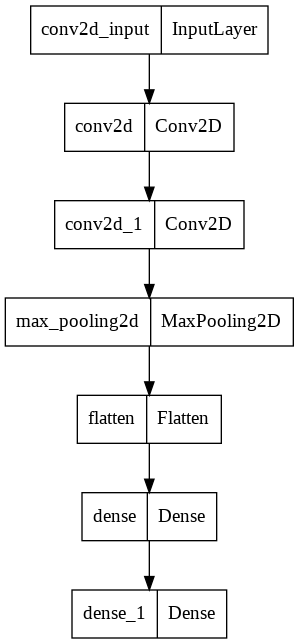

In [17]:
from keras.utils import plot_model
plot_model(first_model)

In [18]:
# compile model
first_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001), #SGD()
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Training the model

In [19]:
history = first_model.fit(x_train, y_train,
          batch_size=256,
          epochs=20,
          verbose=1,
          validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 12s 21ms/step - loss: 1.6402 - accuracy: 0.4144 - val_loss: 1.3494 - val_accuracy: 0.5250
Epoch 2/20
157/157 [==============================] - 3s 18ms/step - loss: 1.2276 - accuracy: 0.5669 - val_loss: 1.2176 - val_accuracy: 0.5785
Epoch 3/20
157/157 [==============================] - 3s 17ms/step - loss: 1.0820 - accuracy: 0.6218 - val_loss: 1.0944 - val_accuracy: 0.6231
Epoch 4/20
157/157 [==============================] - 3s 17ms/step - loss: 0.9636 - accuracy: 0.6648 - val_loss: 1.0599 - val_accuracy: 0.6344
Epoch 5/20
157/157 [==============================] - 3s 17ms/step - loss: 0.8824 - accuracy: 0.6916 - val_loss: 0.9994 - val_accuracy: 0.6528
Epoch 6/20
157/157 [==============================] - 3s 17ms/step - loss: 0.8184 - accuracy: 0.7176 - val_loss: 0.9894 - val_accuracy: 0.6628
Epoch 7/20
157/157 [==============================] - 3s 17ms/step - loss: 0.7511 - accuracy: 0.7397 - val_loss: 0.9545 - val_accuracy: 0.676

# Evaluate the model

In [20]:
score = first_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.5921 - accuracy: 0.6573
Test loss: 1.5921006202697754
Test accuracy: 0.6572999954223633


# (Opsiyonel) Tek image ile modeli test etme

In [21]:
#download images
!wget -O test_cifar_gemi.jpg https://khosann.com/wp-content/uploads/2017/12/yük_gemisi-elektrikli-elektrikli_gemi-çin-guangzhou.jpg
!wget -O test_cifar_ucak.jpg https://www.airlineratings.com/wp-content/uploads/uploads/B797.jpg

--2022-12-11 17:23:51--  https://khosann.com/wp-content/uploads/2017/12/y%C3%BCk_gemisi-elektrikli-elektrikli_gemi-%C3%A7in-guangzhou.jpg
Resolving khosann.com (khosann.com)... 104.21.26.245, 172.67.139.172, 2606:4700:3036::ac43:8bac, ...
Connecting to khosann.com (khosann.com)|104.21.26.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19576 (19K) [image/jpeg]
Saving to: ‘test_cifar_gemi.jpg’

test_cifar_gemi.jpg 100%[===================>]  19.12K  --.-KB/s    in 0s      

2022-12-11 17:23:51 (83.1 MB/s) - ‘test_cifar_gemi.jpg’ saved [19576/19576]

--2022-12-11 17:23:51--  https://www.airlineratings.com/wp-content/uploads/uploads/B797.jpg
Resolving www.airlineratings.com (www.airlineratings.com)... 104.25.127.27, 172.67.64.60, 104.25.126.27, ...
Connecting to www.airlineratings.com (www.airlineratings.com)|104.25.127.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80480 (79K) [image/jpeg]
Saving to: ‘test_cifar_ucak.jpg’

test_c

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [32]:
# load model from file
first_model.save('my_first_mnist_model.h5')

In [34]:
# load image from file
image = load_img("test_cifar_ucak.jpg", target_size=(32, 32))
image = img_to_array(image) / 255 
image = np.expand_dims(image, axis=0)
print('shape:', image.shape)

shape: (1, 32, 32, 3)


In [35]:
preds = first_model.predict(image)

1/1 [==============================] - 0s 156ms/step


In [36]:
preds

array([[9.9527431e-01, 1.5189484e-06, 1.4065846e-04, 1.3336986e-10,
        8.0077726e-08, 1.2171022e-12, 1.7235795e-09, 6.7452277e-08,
        4.5832177e-03, 7.6283719e-08]], dtype=float32)

In [37]:
CLASSES[preds.argmax()]

'ucak'

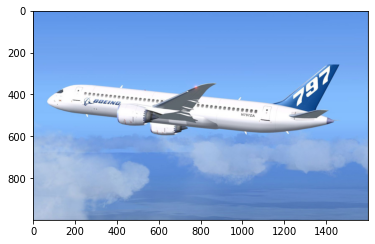

In [38]:
plt.imshow(plt.imread("test_cifar_ucak.jpg"))

# (Opsiyonel) Model Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


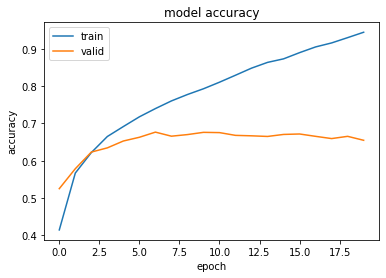

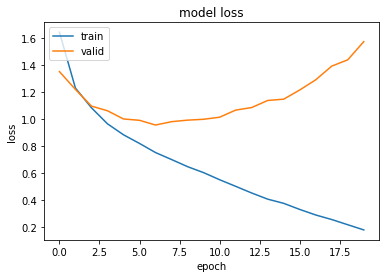

In [39]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()